[Money Creation Examples](http://www.siebenbrunner.com/moneycreation/) > **Example 8**:
# Purchase of US Treasury bonds
This notebook implements the booking process in the Commercial Book-Entry System (https://www.treasurydirect.gov/instit/auctfund/held/cbes/cbes.htm).

We start by importing required utilities:

In [1]:
import os
import sys

base_path = os.path.realpath(os.getcwd()+"/../..")
sys.path.append(base_path)

from abcFinance import Ledger

In [2]:
from IPython.core.display import SVG
from IPython.display import display_svg

def print_money_stocks():
    bank_money = broker_M.get_balance('Customer Deposits')[1]
    bank_money += fi_J.get_balance('Customer Deposits')[1]
        
    print("Total (Bank) Money:",bank_money)

def print_balance_sheets_and_money_stocks():
    display_svg(SVG(fed.draw_balance_sheet("Federal Reserve",width=750)))
    display_svg(SVG(depository_A.draw_balance_sheet("Depository Institution A",width=750)))
    display_svg(SVG(depository_B.draw_balance_sheet("Depository Institution B",width=750)))
    display_svg(SVG(broker_M.draw_balance_sheet("Broker",width=750)))
    display_svg(SVG(fi_J.draw_balance_sheet("Financial Institution J",width=750)))
    
    print_money_stocks()

## Declaration of agents

In [3]:
fed = Ledger(residual_account_name="Equity")
depository_A = Ledger(residual_account_name="Equity")
depository_B = Ledger(residual_account_name="Equity")
broker_M = Ledger(residual_account_name="Equity")
fi_J = Ledger(residual_account_name="Equity")

fed.make_stock_accounts(['Securities Holdings','Securities belonging to Depository A','Securities belonging to Depository B','Reserves Depository A','Reserves Depository B','Assets'])
depository_A.make_stock_accounts(['Securities Holdings','Securities belonging to Broker M','Reserves','Deposits by Broker M'])
depository_B.make_stock_accounts(['Securities Holdings','Securities belonging to Financial Institution J','Reserves','Deposits by Financial Institution J'])
broker_M.make_stock_accounts(['Securities Holdings','Securities belonging to Customers','Reserves with Depository A','Customer Deposits'])
fi_J.make_stock_accounts(['Securities Holdings','Securities belonging to Customers','Reserves with Depository B','Customer Deposits'])

## Initialize balance sheets
All symmetric balance sheets with 0 equity, for simplicity.

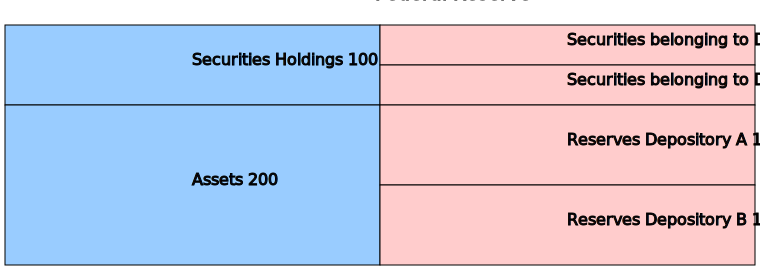

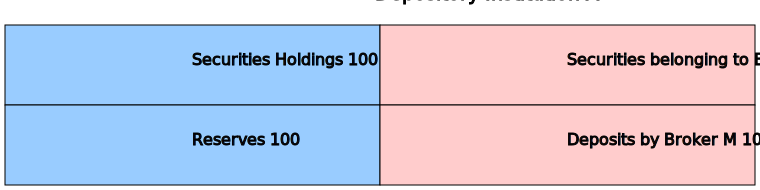

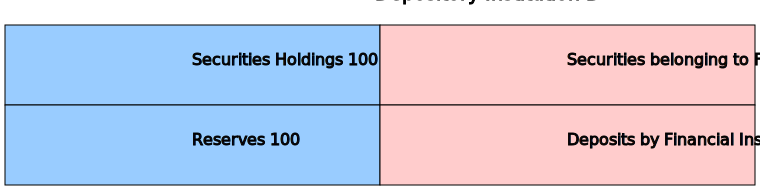

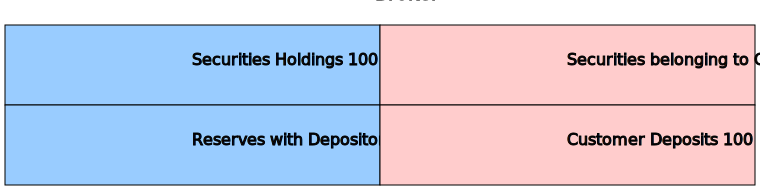

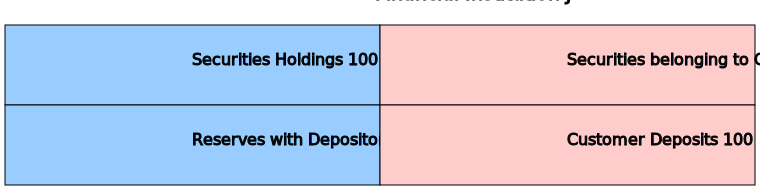

Total (Bank) Money: 200


In [4]:
fed.book(debit=[('Securities Holdings',100)],credit=[('Securities belonging to Depository A',50),('Securities belonging to Depository B',50)])
fed.book(debit=[('Assets',200)],credit=[('Reserves Depository A',100),('Reserves Depository B',100)])
depository_A.book(debit=[('Securities Holdings',100)],credit=[('Securities belonging to Broker M',100)])
depository_A.book(debit=[('Reserves',100)],credit=[('Deposits by Broker M',100)])
depository_B.book(debit=[('Securities Holdings',100)],credit=[('Securities belonging to Financial Institution J',100)])
depository_B.book(debit=[('Reserves',100)],credit=[('Deposits by Financial Institution J',100)])
broker_M.book(debit=[('Securities Holdings',100)],credit=[('Securities belonging to Customers',100)])
broker_M.book(debit=[('Reserves with Depository A',100)],credit=[('Customer Deposits',100)])
fi_J.book(debit=[('Securities Holdings',100)],credit=[('Securities belonging to Customers',100)])
fi_J.book(debit=[('Reserves with Depository B',100)],credit=[('Customer Deposits',100)])
print_balance_sheets_and_money_stocks()

## Transfer of a security from a customer of Broker M to a customer of Financial Institution J
The booking statements on the customers' balance sheet are left out for brevity, they would be completely analogous.

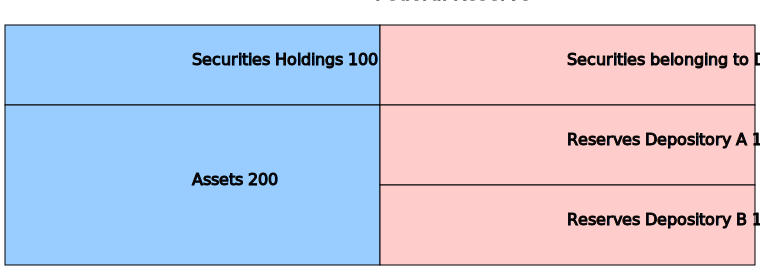

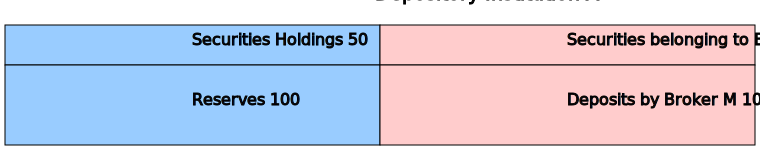

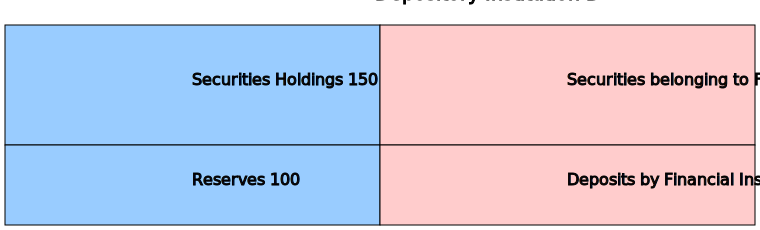

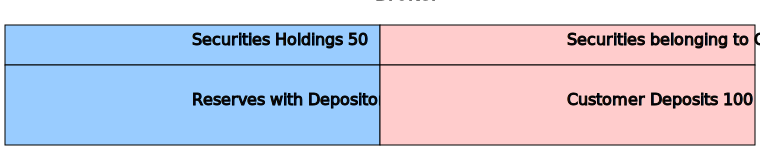

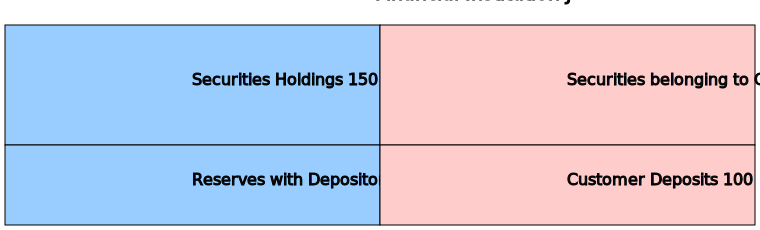

Total (Bank) Money: 200


In [5]:
broker_M.book(debit=[('Securities belonging to Customers',50)],credit=[('Securities Holdings',50)])
depository_A.book(debit=[('Securities belonging to Broker M',50)],credit=[('Securities Holdings',50)])
fed.book(debit=[('Securities belonging to Depository A',50)],credit=[('Securities belonging to Depository B',50)])
depository_B.book(debit=[('Securities Holdings',50)],credit=[('Securities belonging to Financial Institution J',50)])
fi_J.book(debit=[('Securities Holdings',50)],credit=[('Securities belonging to Customers',50)])
print_balance_sheets_and_money_stocks()

## Transfer of the payment in the opposite direction

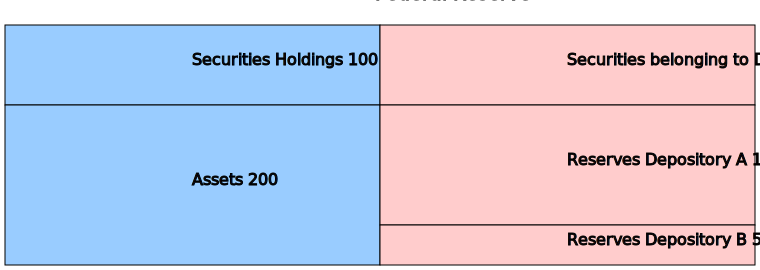

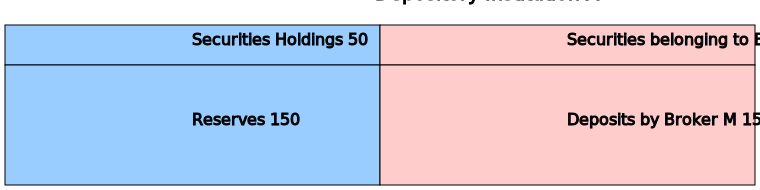

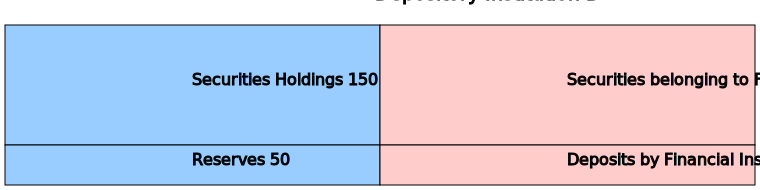

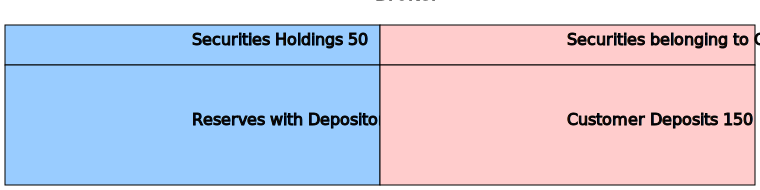

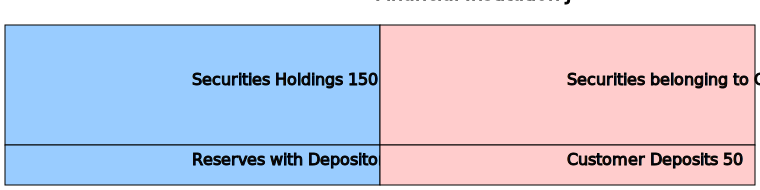

Total (Bank) Money: 200


In [6]:
fi_J.book(debit=[('Customer Deposits',50)],credit=[('Reserves with Depository B',50)])
depository_B.book(debit=[('Deposits by Financial Institution J',50)],credit=[('Reserves',50)])
fed.book(debit=[('Reserves Depository B',50)],credit=[('Reserves Depository A',50)])
depository_A.book(debit=[('Reserves',50)],credit=[('Deposits by Broker M',50)])
broker_M.book(debit=[('Reserves with Depository A',50)],credit=[('Customer Deposits',50)])
print_balance_sheets_and_money_stocks()